## SA STEP1 cmax -> GPP (+-.5)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import utils as ut
from pandas.plotting import scatter_matrix
%matplotlib inline

In [47]:
ls data/calib-step1-md1/param_step1-md1.csv

out_step1-md1.csv    param_step1-md1.csv


In [4]:
cat EML/SA-cmax-EML-05/param_props.csv

name,bounds,initial,cmtnum,pftnum
cmax,"[16.5, 49.5]",33.0,21,0
cmax,"[86.0, 258.0]",172.0,21,1
cmax,"[215.0, 645.0]",430.0,21,2
cmax,"[1.6, 4.800000000000001]",3.2,21,3
cmax,"[12.0, 36.0]",24.0,21,4
cmax,"[37.5, 112.5]",75.0,21,5
cmax,"[21.5, 64.5]",43.0,21,6


In [8]:
path='EML/SA-cmax-EML-05/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['cmax0','cmax1','cmax2','cmax3','cmax4','cmax5','cmax6']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6']
df_model.columns = model_name

In [13]:
df_model.shape

(501, 7)

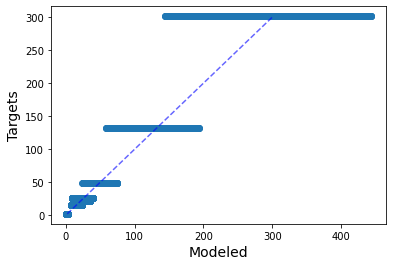

In [7]:
ut.one_to_one_match_plot(df_model)

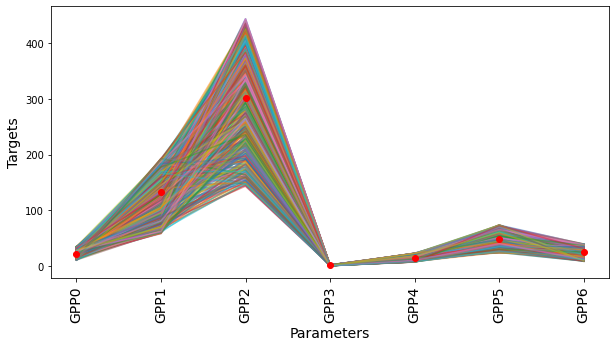

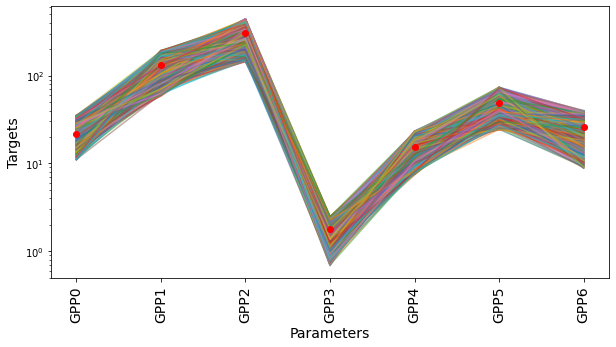

In [8]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

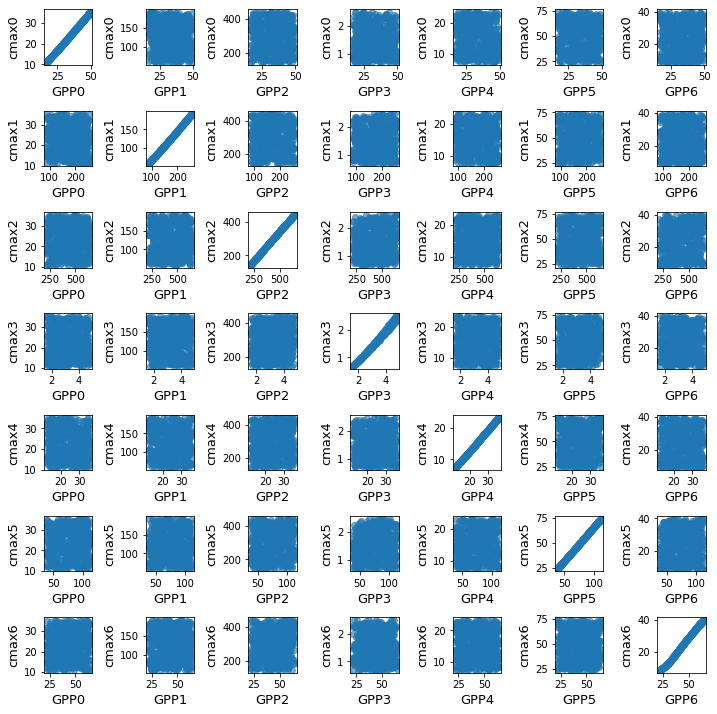

In [9]:
[n,m]=df_param.shape
fig, axs = plt.subplots(nrows=m, ncols=7, figsize=(10,10))
for i in range(m):
    for j in range(7):
        axs[i,j].scatter(df_param.iloc[0:n,i], df_model.iloc[0:n,j],alpha=0.6)
        axs[i,j].set_xlabel(df_model.columns[j],FontSize=13)
        axs[i,j].set_ylabel(df_param.columns[i],FontSize=13)
fig.tight_layout() 

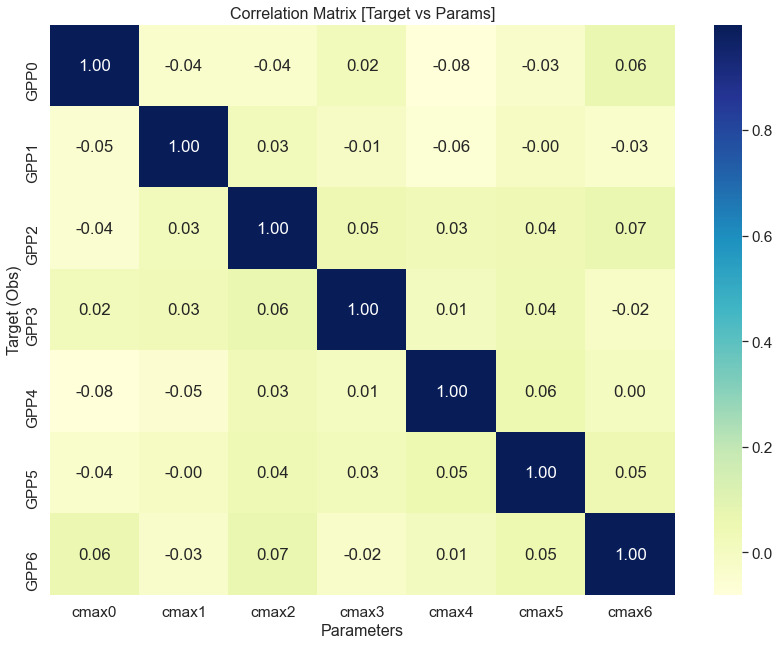

In [10]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

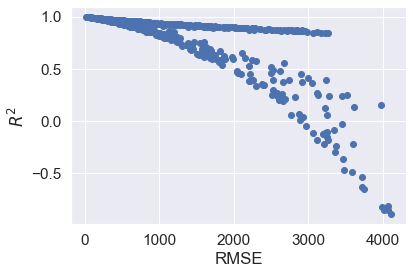

In [11]:
ut.plot_r2_rmse(df_model)

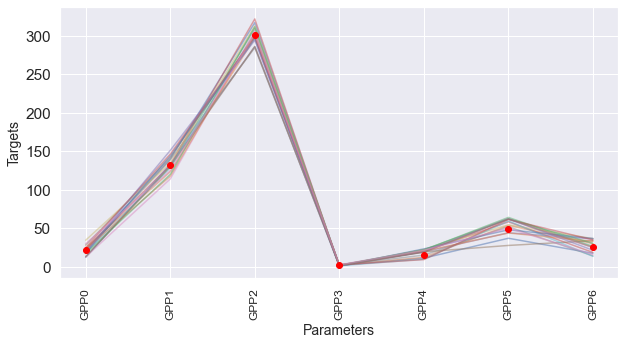

In [24]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.99)

In [10]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.99)
xparams

,cmax0,cmax1,cmax2,cmax3,cmax4,cmax5,cmax6,$R^2$,RMSE,MAPE
48,31.873664,192.411886,461.613080,3.534391,17.895909,57.266094,35.738014,0.993284,76.383043,0.198682
73,34.943106,171.381735,431.999932,3.657212,19.499972,82.300496,51.122756,0.997728,21.411178,0.097096
121,19.061788,180.541807,449.389830,3.394295,33.370467,97.523836,46.495721,0.994402,57.806813,0.199078
142,32.424169,181.838611,466.500028,1.982458,30.670106,88.868207,36.873093,0.992745,81.329187,0.276859
167,18.592030,183.430815,415.789397,1.813062,29.646973,67.878551,59.105451,0.992471,67.540768,0.384216
169,39.921016,194.368688,434.723560,4.027842,29.814161,42.830947,56.003298,0.990374,95.117938,0.228658
179,18.924697,158.832954,444.600876,4.235155,31.074286,93.423921,44.497952,0.991086,89.231630,0.221553
199,28.785211,190.506315,413.449409,4.276793,23.637237,79.754840,31.446964,0.992270,70.700301,0.189293
271,48.048475,185.223663,453.991783,1.959005,34.208040,83.052360,59.556256,0.993462,66.413325,0.308306
297,26.464912,177.231925,439.726456,2.586124,15.701249,90.704995,30.499181,0.995333,47.798313,0.354525


In [29]:
def z_score(y_short,y_long,outnames):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    outnames : dataframe header
    '''

    zscore=[]
    for iname in outnames:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
    
    return zscore

z=z_score(ymodel,df_model,model_name)



In [30]:
z

[-0.10059029506773771,
 -0.02212130145972047,
 0.10244091114507003,
 -0.3885393980459975,
 0.4750119266494441,
 0.30552513044353896,
 0.004560478931589744]

In [32]:
for iname in model_name:
    zscore=(ymodel[iname].mean()-df_model[iname].iloc[-1])/ymodel[iname].std()
    print(iname,zscore)

GPP0 -0.10059029506773771
GPP1 -0.02212130145972047
GPP2 0.10244091114507003
GPP3 -0.3885393980459975
GPP4 0.4750119266494441
GPP5 0.30552513044353896
GPP6 0.004560478931589744


In [18]:
df_model.tail()

,GPP0,GPP1,GPP2,GPP3,GPP4,GPP5,GPP6
496,26.532146,81.240359,263.846013,0.808996,10.564452,40.578229,11.589434
497,12.261586,192.047080,181.276690,2.028746,13.495712,24.657890,32.243303
498,28.686541,70.183545,225.322414,1.400460,18.151696,60.007155,10.740270
499,27.395524,182.109782,412.989924,0.789225,7.958174,27.284359,11.739226
500,21.831000,132.247000,301.400000,1.792000,15.469000,49.072000,26.139000


In [28]:
xparams.GPP0/describe()

,cmax0,cmax1,cmax2,cmax3,cmax4,cmax5,cmax6,$R^2$,RMSE,MAPE
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,30.646745,182.165056,439.637983,3.279835,27.497734,80.047517,46.539649,0.993429,65.512061,0.226290
std,8.974921,12.885922,16.181785,0.976680,6.798052,15.579885,10.174212,0.001915,19.187789,0.076537
min,18.592030,158.832954,413.449409,1.813062,14.823486,42.830947,30.499181,0.990374,21.411178,0.097096
25%,25.397005,173.547312,430.374447,2.462609,21.835929,69.250479,37.746230,0.992321,51.816722,0.191640
50%,30.329437,181.190209,438.534799,3.506230,30.113183,82.676428,45.653420,0.993232,69.120535,0.219817
75%,35.381296,191.935493,451.775168,4.166846,32.548944,93.862831,55.785168,0.994705,75.379948,0.264809
max,48.048475,205.854572,466.500028,4.670679,35.557503,97.523836,59.863514,0.997728,95.117938,0.384216


In [29]:
cat EML/SA-cmax-EML-05/param_props.csv

name,bounds,initial,cmtnum,pftnum
cmax,"[16.5, 49.5]",33.0,21,0
cmax,"[86.0, 258.0]",172.0,21,1
cmax,"[215.0, 645.0]",430.0,21,2
cmax,"[1.6, 4.800000000000001]",3.2,21,3
cmax,"[12.0, 36.0]",24.0,21,4
cmax,"[37.5, 112.5]",75.0,21,5
cmax,"[21.5, 64.5]",43.0,21,6


In [27]:
ymodel.describe()

,GPP0,GPP1,GPP2,GPP3,GPP4,GPP5,GPP6
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,21.158401,132.023036,302.549030,1.581241,17.649751,52.252318,26.175793
std,6.686522,10.124344,11.216512,0.542438,4.590940,10.409350,8.067779
min,12.304583,113.888020,284.203568,0.786263,9.171354,27.571963,13.388486
25%,17.204775,125.520767,296.478729,1.115536,13.766175,44.970070,19.198879
50%,20.767006,131.258213,302.380203,1.687356,19.410021,53.986281,25.677538
75%,24.526889,139.387224,310.822564,2.073451,21.120503,61.348999,33.520027
max,34.367992,150.852541,321.556604,2.389929,23.115976,63.930171,36.670447


In [11]:
[df_param,df_model]=get_sa_data_soilc_all('data/sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/')

In [12]:
cat data/sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.004495000000000027, 0.894505]",0.4495,1,None
kdcrawc,"[0.006340000000000012, 1.26166]",0.634,1,None
kdcsoma,"[0.00539999999999996, 1.0746000000000002]",0.54,1,None
kdcsompr,"[0.0005, 0.002]",0.002,1,None
kdcsomcr,"[1.75e-05, 9e-05]",7e-05,1,None


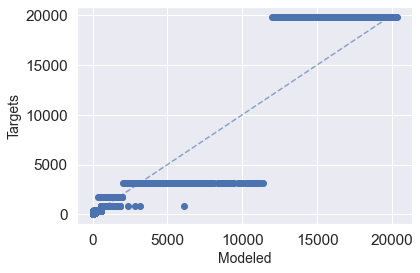

In [13]:
ut.one_to_one_match_plot(df_model)

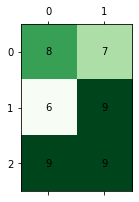

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2, 4))

intersection_matrix = np.random.randint(0, 10, size=(3, 2))

[nrows,mcols]=intersection_matrix.shape
ax.matshow(intersection_matrix, cmap=plt.cm.Greens)

for i in range(0,mcols):
    for j in range(0,nrows):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

##  Calibration (setup similar to the SA 0.5 and bound)

In [16]:
ls EML/eml-step1-cmax/

out_step1-eml.csv    param_step1-eml.csv


In [18]:
path='EML/eml-step1-cmax/' #10% variance
params='param_step1-eml.csv'
model='out_step1-eml.csv'
df_model = pd.read_csv(path+model,header=None)

output_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6']
df_model.columns = output_name

df_param = pd.read_csv(path+params,header=None)
output_name = ['cmax0','cmax1','cmax2','cmax3','cmax4','cmax5','cmax6']
df_param.columns = output_name
df_model.head()
df_model.shape

(11, 7)

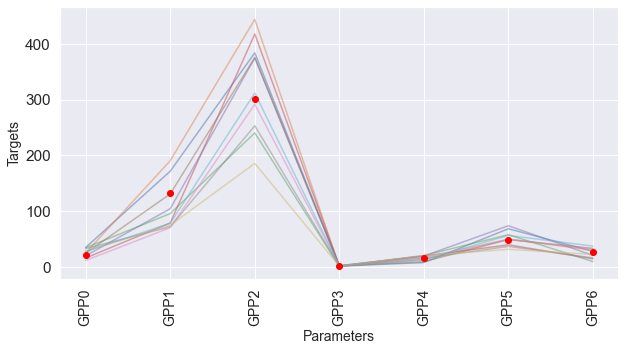

In [19]:
ut.spaghetti_match_plot(df_param,df_model)
#ut.spaghetti_match_plot(df_param,df_model,logy=True)

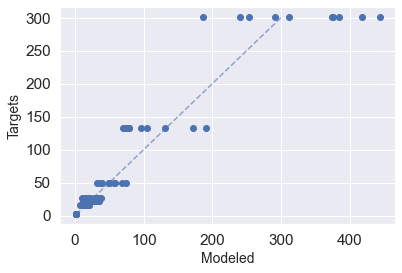

In [20]:
ut.one_to_one_match_plot(df_model)

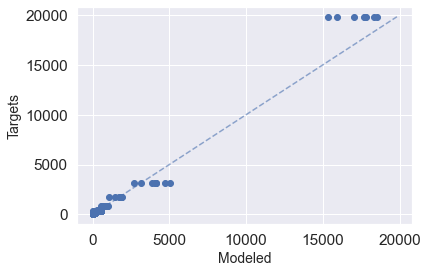

In [26]:
ut.one_to_one_match_plot(df_model)

In [21]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.9)
xparams[xparams.MAPE<1]

,cmax0,cmax1,cmax2,cmax3,cmax4,cmax5,cmax6,$R^2$,RMSE,MAPE
0,48.767689,231.890975,558.403703,2.916246,12.515575,103.745380,48.505548,0.921459,1284.031815,0.348130
4,29.333123,147.209079,545.518501,4.428274,30.344541,112.357576,39.539293,0.934276,975.746171,0.222881
5,35.431116,180.923756,545.810565,3.824423,15.104614,75.482690,55.398482,0.947404,801.789179,0.175757
6,17.735666,102.923371,426.914143,3.337481,26.783109,76.999480,54.355149,0.934340,580.272717,0.321126
9,39.255893,112.775942,453.289151,4.208610,19.969817,86.683371,60.918076,0.953227,463.649772,0.248989


## nmax to NPP
### +- 0.75

In [55]:
path='EML/sa-nmax-EML-075-R/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['nmax0','nmax1','nmax2','nmax3','nmax4','nmax5','nmax6']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6',
'NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6']
df_model.columns = model_name

In [60]:
df_param.shape

(500, 7)

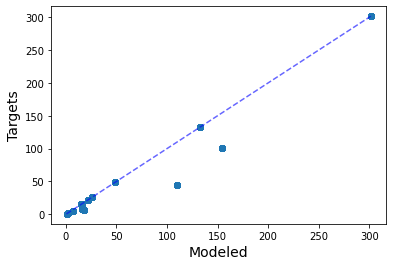

In [57]:
ut.one_to_one_match_plot(df_model)

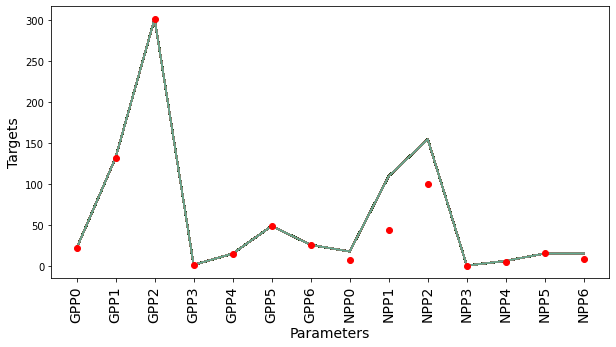

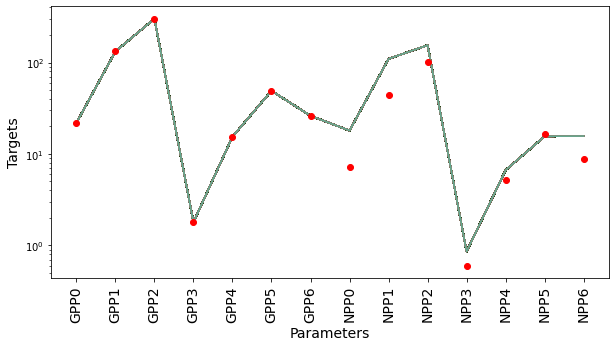

In [58]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [5]:
ls EML/

SA-cmax-EML-05-EJ/     sa-nmax-EML-bound-EJ/
sa-nmax-EML-075-R-EJ/  sa-nmax2-EML-bound-EJ/


In [6]:
path='EML/sa-nmax-EML-bound-EJ/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['nmax0','nmax1','nmax2','nmax3','nmax4','nmax5','nmax6']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6',
'NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6']
df_model.columns = model_name

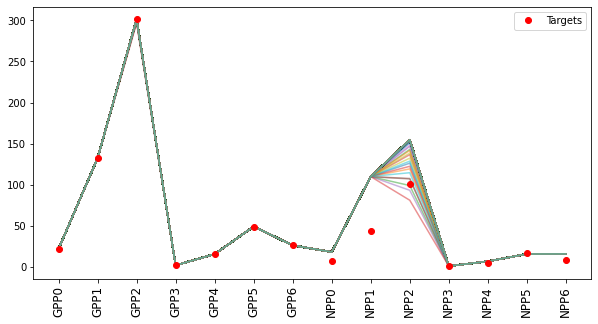

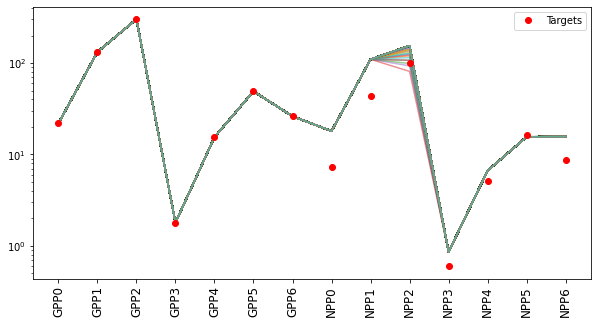

In [7]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [63]:
df_model.shape

(501, 14)

In [11]:
df_param.shape

(500, 7)

In [12]:
df_model.iloc[:,7:].shape

(501, 7)

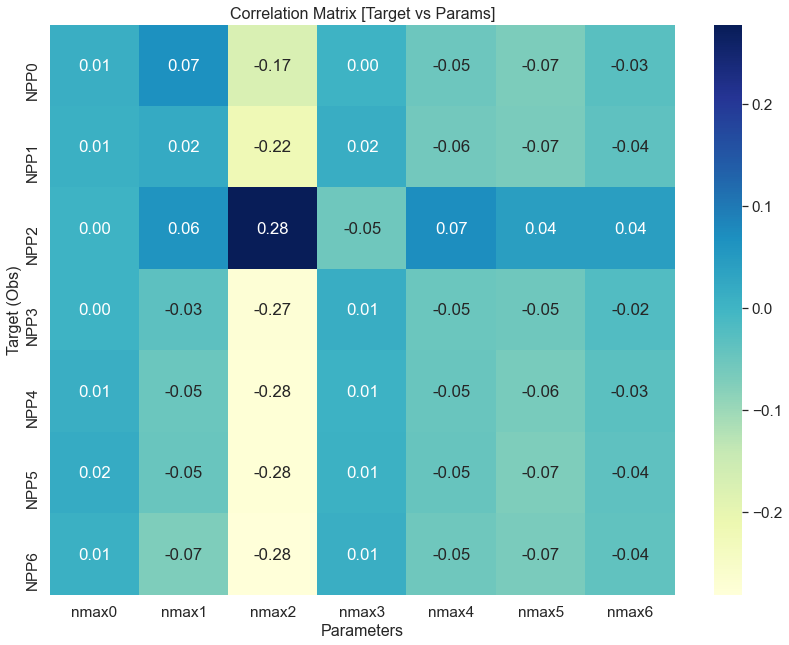

In [13]:
corr_mp=ut.get_output_param_corr(df_param,df_model.iloc[:,7:])

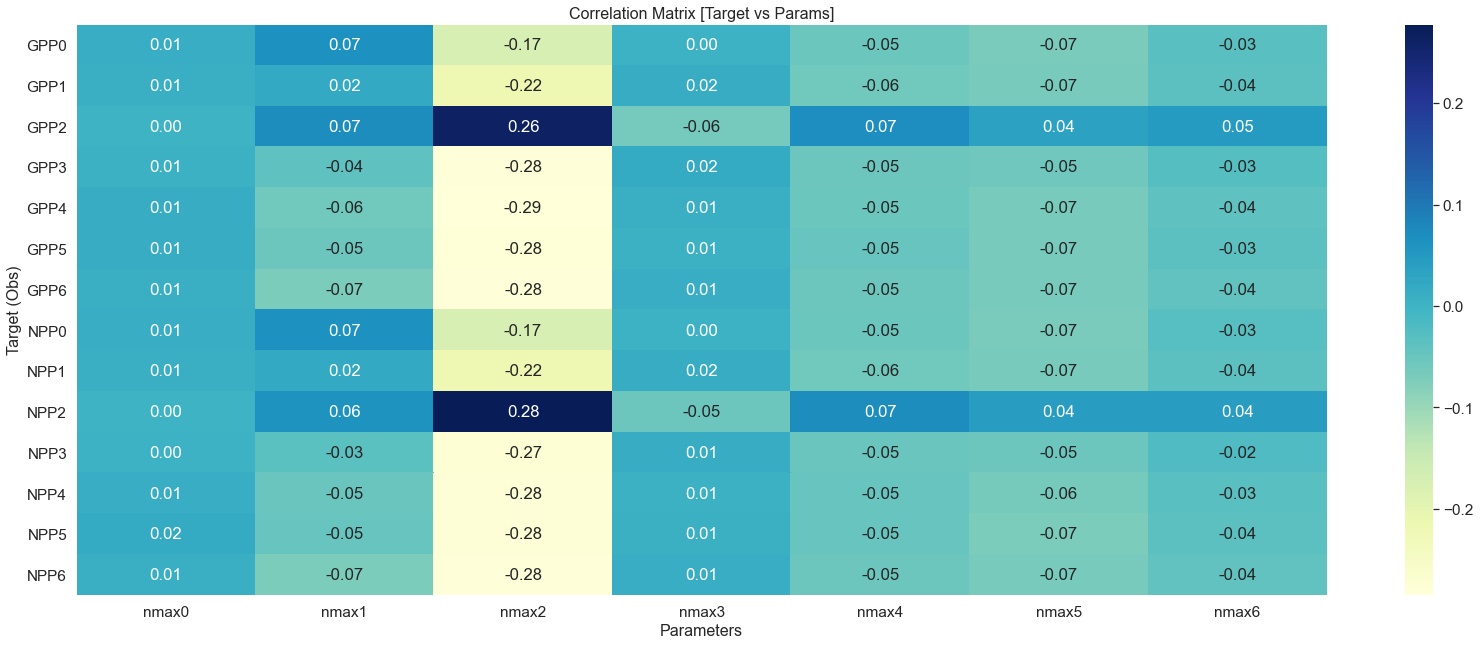

In [68]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

In [69]:
path='EML/sa-nmax2-EML-bound/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['nmax0','nmax1','nmax2','nmax3','nmax4','nmax5','nmax6']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6',
'NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6']
df_model.columns = model_name

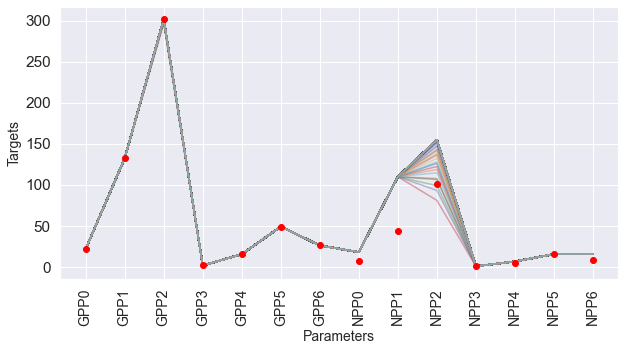

In [70]:
ut.spaghetti_match_plot(df_param,df_model)

In [72]:
df_param.describe()

,nmax0,nmax1,nmax2,nmax3,nmax4,nmax5,nmax6
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,7.199933,28.000264,15.049946,0.499979,2.999941,10.000181,4.999680
std,3.120575,12.136116,8.639592,0.216711,1.300172,4.334312,2.167183
min,1.805201,7.054161,0.100670,0.125050,0.753394,2.521973,1.253830
25%,4.496687,17.526253,7.584191,0.312652,1.879561,6.268102,3.126991
50%,7.196460,28.013607,15.053706,0.500625,2.997391,10.012750,5.004223
75%,9.899908,38.494519,22.516165,0.687125,4.124494,13.736975,6.869491
max,12.589587,48.983880,29.941179,0.874346,5.242502,17.496310,8.744525


In [75]:
cat EML/sa-nmax2-EML-bound/param_props.csv

name,bounds,initial,cmtnum,pftnum
nmax,"[1.7999999999999998, 12.600000000000001]",7.2,21,0
nmax,"[7.0, 49.0]",28.0,21,1
nmax,"[0.1, 30]",15.2,21,2
nmax,"[0.125, 0.875]",0.5,21,3
nmax,"[0.75, 5.25]",3.0,21,4
nmax,"[2.5, 17.5]",10.0,21,5
nmax,"[1.25, 8.75]",5.0,21,6
